# Predicting Restaurant Rating Of New Restaurant on Zomato
### Machine Learning capstone project

# Project Overview
Zomato is a restaurant search and discovery website/application which operates in many major cities spread across 24 countries. 
Zomato helps land customers over the restaurants through many search options based on restaurants location, restaurant type, cuisines they serve and helps discover better using filters and sort by options for advance searches.
    in this project dataset for restaurants in **Bengaluru,India** is used [dataset link](https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants)<br>
> **The dataset contains ratings marked as "NEW" for 2000+ rows. These rows will be used for predicting after the model is trained and tested.**
    
# Problem Statement
**Rating System of Zomato**<br>
The restaurants on Zomato have ratings between 1-5 with an interval of .1. example 1.1,3.2,3.4. The customers gives ratings which is denoted as stars, a customer reviews/rates a restaurant by giving a score/star between 1 to 5. **The final rating is not the average** of the ratings given by the customers but the ratings of restaurants are distributed over a **normal distribution curve for a city** and can change by ratings of other restaurants.[Zomato rating system](https://www.zomato.com/blog/project-warp-fighting-bias-on-zomato) <br><br>
<img src="images/rest_rating.jpg">
src: https://www.zomato.com/bangalore/indiranagar-restaurants <br><br>
**Example to understand better**<br>
For this reason the ratings may change in time based on ratings/reviews given on another restaurant. That is the ratings are relative to each other. <br>
For example if a restaurant A gets 5 star ratings 5 times, it does not mean that the final rating will be 5. It can be 3.2, 4.5. If another restaurant B gets 3, 5 stars and 1, 4 star and gets 2 reviews will likely get higher rating than A because it got 2 positive reviews. <br><br>


> **Problem:**<br> If a New restaurant wants to get on Zomato it will be placed on the normal curve. The normal curve is centered around 3.8,3.9 and most of the restaurants fight to be on the right side of this curve i.e on the right side of 3.8. Even if the customer rating for the resrtaurant is good the overall rating may say otherwise based on complicated Zomato rating algorithms which compares the rating/review frequency and uses NLP for reviews. 
<br><br>
 **Rating bins**
There are 8 bins in Zomato between 1-5 with and interval of .5. Each of the rating is color coded. **This project is a classification problem, which predicts the bin, the rating of the NEW restaurant will fall into**
<img src = "images/labels_rating.png">
<br>
**The Aim of this project** is to make a Deep Learning model which predicts the bin of the NEW restaurant will fall into. 
<img src = "images/new.png" width = "200">
src: https://www.zomato.com/bangalore/indiranagar-restaurants
<br>
**Why there is a need of better rating?**<br>
-	Zomato charges less commission for higher rating rstaurants
-	Zomato has filter options(rating 3.5+) which displays better rated restaurants in the search
-	Restaurant shows on top over the other insearch
- Attracts more footfall to the Restaurants.




## Table of Contents
<ol>
<li><a href="#dataexploration">Data Exploration</a></li>
<li><a href="#visualization">Exploring visulization</a></li>
    <ol>
        <li><a href="#bookonline">Book table and Online order</a> </li>
        <li><a href="#rating">Visulazing Rating</a> </li>
        <li><a href="#location">Listed in Location</a> </li>
        <li><a href="#resttype">List in Restaurant Type</a> </li>
        <li><a href="#cuisines">Visualizing different Cuisines</a> </li>
    </ol>
<li><a href="#preprocessing">Data Pre-Processing</a></li>
    <ol>
        <li><a href="#assessingcol">Assessing columns missing</a> </li>
        <li><a href="#assessingrow">Assessing Row missing</a> </li>
        <li><a href="#precol">Preprocessing columns</a> </li>
        <li><a href="#impfea">Imputing and Feature scaling</a> </li>
        <li><a href="#traintest">Training and Testing set</a> </li>
    </ol>
<li><a href="#benchmark">Training and Testing Benchmarck Model</a></li>
<li><a href="#nn">Training, Optimizing and Testing Neural Network Model</a></li>
<li><a href="#predict">Predicting New Restaurant Color Bin</a></li>
<li><a href="#lim">Limitation,Conclusion and Improvement</a></li>
</ol>

> After each Visualization or process there is an **Inference** section
After Each Section There is a **Summary** section

In [1]:
#importing all the libraries here
#imorting numpty and pandas to handle dataframe
import numpy as np
import pandas as pd
#import matplotlib to plot graphs
import matplotlib.pyplot as plt

#splting data into train and test data
from sklearn.model_selection import train_test_split
#importing simple imputer to deal with missing values
from sklearn.impute import SimpleImputer
#Used Minax Scalar for scaling values between [0,1]
from sklearn.preprocessing import MinMaxScaler

#bencahmarck model and evaluration metrics
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Librabries for creating and training neural Networks
import torch

#helper function
from helper import *

#functions for exploratory visualizations
import visuals as vs

#functions for training,processing and predicitng
import train as tr
import predict as pr

%matplotlib inline 

In [2]:
#copying data in csv file to dataframe
bengaluru_res_df = pd.read_csv("zomato/zomato.csv")

<a id='dataexploration'></a>
## 1. Exploring Data

In [3]:
# displaying the first two rows
bengaluru_res_df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [4]:
bengaluru_res_df.shape

(51717, 17)

In [5]:
bengaluru_res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [6]:
bengaluru_res_df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
bengaluru_res_df.isnull().sum().sum()

37700

In [8]:
bengaluru_res_df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [9]:
#total number of unique restaurants
bengaluru_res_df['name'].value_counts().shape[0]

8792

In [10]:
bengaluru_res_df.duplicated().sum()

0

**About Data set**
- Dataset size: 51,717 rows x 17 columns
- All columns are of type "object" except for votes
- 7775 ratings are missin in the rating column
- 1208 phone numbers are missing in the phone column
- 21 are mising location
- 28,078 dished liked are missing
- 45 cuisines are missing
- 346 approx cost for two persons is missing
- No duplicated row
- Basic statistics is discussed after processing the data <a href="#stats">click here for stats</a>

**Columns details**
1.	**url(object)** – This is simply a string with tells the URL which is almost common for all as it is starting with Zomato.com/xyz/abc.
2.	**Address(object)** – Complete address of the restaurant. Contains the full address which is not required for the analysis, can be deleted.
3.	**Name(object)** – Name of the restaurant, The name is unique and is different languages such as Gabar(Hindi Word), Asha(Hindi word), Twist (Englih) – it will be difficult to categories 51,717 values in the ANme column. For these reasons the column can be dropped.
4.	**Online order(Object)** – Yes or No, useful for predicting by converting it to binary.
5.	**Book Table(Object)** – Restaurant provides online table booking service (yes or no), useful for predicting by converting it to binary.
6.	**Rate (Target)**– Overall rating of the restaurant between” 1 – 5” upto one decimal point example 4.2. “New” for new restaurants. 
7.	**Votes(int)** – Total number of reviews/votes, not useful for predicting the target variable, needs to be dropped.
8.	**Phone(object)** – Phone number of the restaurant. The counts of phone numbers provided could help in predicting target.
9.	**Location(object)** – Neighborhood of the Restaurant in Bengaluru, important for predicting rating. One- hot encode to change it to dummies.
10.	**Rest_type(object)** – Type of the restaurant, important for predicting rating. One- hot encode to change it to dummies.
11.	**Dish_liked(object)** – Dish liked by people in the restaurant,
12.	**Cuisines(object)** – Cuisines types in the re restaurants. Types are comma separated
13.	**Approx_cost(object)** – expected cost for meal of two in Rupees, important for prediction
14.	 **Reviews_list(object)** - list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer. Needs to be dropped for the prediction for new restaurant.
15.	**Menu_item(Object)** – List of menus available in restaurants. Contains more than 54% missing values, needs to be dropped. 
16.	**Listed_in(type)** -  type of meal
17.	**Listed_in(city)** - contains the neighborhood in which the restaurant is listed - duplicate column can be dropped


<a id='visualization'></a>
## 2. Exploring visulization
Visualizing columns using matplotlib

<a id='bookonline'></a>
### 2.1 Book table and Online order 

In [11]:
#References for visualizations used in visuals.py 
#https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
#https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors
#https://www.geeksforgeeks.org/append-extend-python/ 
#https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
#https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors
#https://matplotlib.org/3.1.1/tutorials/text/text_intro.html - 
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
#https://www.geeksforgeeks.org/python-pandas-series-sort_values/
#https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe

In [12]:
#Storing uniques values of Book table in series
series_book_table = bengaluru_res_df.groupby('book_table').count()['online_order']
print("REstaurants with book table options:\n Yes:",series_book_table['Yes'],"\nNo:", series_book_table['No'])
print("Total Number of restaurants:",bengaluru_res_df.shape[0]," total Yes + No:",(series_book_table['Yes']+series_book_table['No']))

REstaurants with book table options:
 Yes: 6449 
No: 45268
Total Number of restaurants: 51717  total Yes + No: 51717


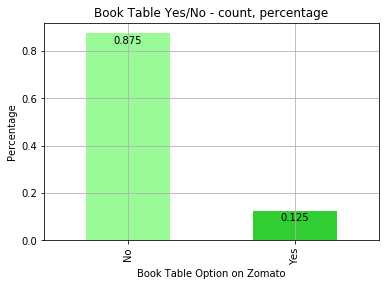

In [13]:
vs.bar_booktable(bengaluru_res_df)

>**Interpretation:**
out of 51,717 records 87.5% of restaurants do not have options to book table online using Zomato

In [14]:
#counting the unique values and storing it in series
series_online_order = bengaluru_res_df.groupby('online_order').count()['book_table']
print("Restaurants with online order options:\n Yes:",series_online_order['Yes'],"\nNo:", series_online_order['No'])
print("Total Number of restaurants:",bengaluru_res_df.shape[0]," total Yes + No:",(series_online_order['Yes']+series_online_order['No']))

Restaurants with online order options:
 Yes: 30444 
No: 21273
Total Number of restaurants: 51717  total Yes + No: 51717


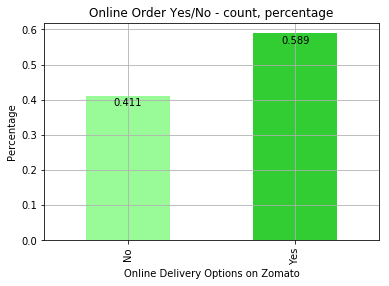

In [15]:
vs.bar_onlineorder(bengaluru_res_df)

> **Interpretation:** out of 51,717 records 41.1% of restaurants do not have options to deliver using Zomato application

<a id='rating'></a>
### 2.2 Rating bar plot

#### 2.2.1 Ratings Between 1-5 with interval .1

In this section I have
> - Visualized the ratings, normal curve formded by the count of unique ratings using bar graph<br>
> -  Visualized the color bins for the ratings of the restaurant using bar graph

The ratings are in the form of string '3.5 /5' containing spaces in some and have few missing values in form of NaNs<br>
The Ratngs are in the form:
    - *'3.5/5'* -> rating out of 5
    - *'-'* -> no ratings given for this restaurant
    - *NaNs* -> missing ratings in the column

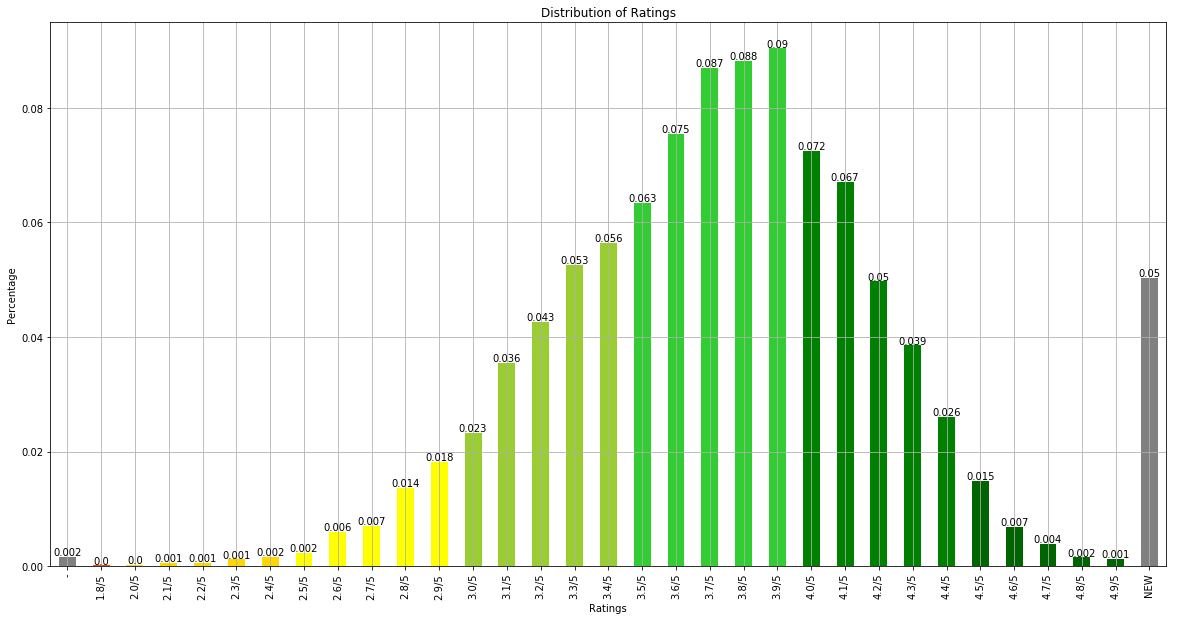

In [16]:
vs.rating_curve(bengaluru_res_df)

> **Interpretation:** The rating count is fitted inside a normal curve centered around 3.8 rating. .2% of ratings are not goven yet to the restauants and 5% of the restaurants are new on zomato. 

### 2.2.2 Ratings Color bins

As discussed above, Zomato has 8 colored bins with dark green containing the highest top 6 ratings 4.5,4.6,4.7,4.8,4.9 and 5 and red containing the lowest rating 1,1.1,1.2,1.3,1.4... visualizing the ratios for each bin.<br> There are two more bins marked as 
- "NEW" for new restaurants on Zomato 
- "-" restaurants not rated yet on Zomato
>**Note**: for visualization "New" and "-" bins are also considered <br>
> **For this project, the model is trained to predict these colored bins**

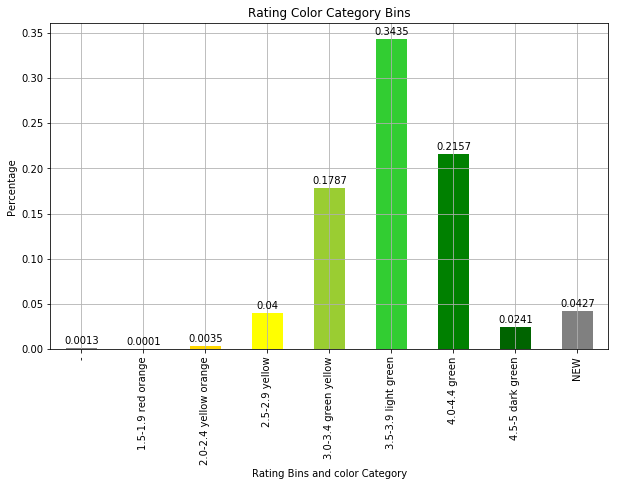

In [17]:
vs.color_bins(bengaluru_res_df)

** Ratios of the Restaurants **
- 34.35% of the restaurants in Bengaluru have ratings between 3.5 - 3.9. 
- 21.57% of the restaurants have ratings between 4.0 - 4.4.
- Only 2.41% of the restaurants have ratings between 4.5 - 5.
- Only 23.98% of the restaurant falls on the right of the curve

<a id='location'></a>
### 2.3 Location and Location listed in city 

#### 2.3.1 Listed in 30 Location

Zomato displays 30 popular localities in Bengaluru. The 30 results changes with the selected city. <br> Top 30 localities in Bengaluru on 17th - jun- 2019 is 
<img src = "images/zomato_localities.png">
src: https://www.zomato.com/bangalore

The 30 locations are stored in "listed_in(city)" columns. the visualization will show the locations and the counts of restaurants present there.<br>
>Note: The visualization may differ from the image above as the data considered is from another date.

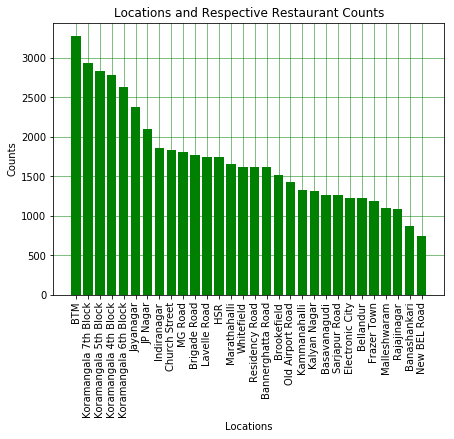

In [18]:
vs.listed_in_city(bengaluru_res_df)

#### 2.3.2 Locations of the restaurant i.e closest location/area from the restaurant
The 30 locations have restaurants within 10-12 kms. There are about 93 locations which gives restaurant results closer than the listed_in_city locations.

Total Locations: 93 
Locations: Index(['BTM', 'HSR', 'Koramangala 5th Block', 'JP Nagar', 'Whitefield',
       'Indiranagar', 'Jayanagar', 'Marathahalli', 'Bannerghatta Road',
       'Bellandur', 'Electronic City', 'Koramangala 1st Block', 'Brigade Road',
       'Koramangala 7th Block', 'Koramangala 6th Block', 'Sarjapur Road',
       'Ulsoor', 'Koramangala 4th Block', 'MG Road', 'Banashankari',
       'Kalyan Nagar', 'Richmond Road', 'Frazer Town', 'Malleshwaram',
       'Basavanagudi', 'Residency Road', 'Banaswadi', 'Brookefield',
       'New BEL Road', 'Kammanahalli', 'Rajajinagar', 'Church Street',
       'Lavelle Road', 'Shanti Nagar', 'Shivajinagar', 'Domlur',
       'Cunningham Road', 'Old Airport Road', 'Ejipura', 'Commercial Street',
       'St. Marks Road', 'Koramangala 8th Block', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Wilson Garden', 'Bommanahalli',
       'Koramangala 3rd Block', 'Kumaraswamy Layout', 'Thippasandra',
       'Basaveshwara Nagar', 'Nagawara', 'Seshad

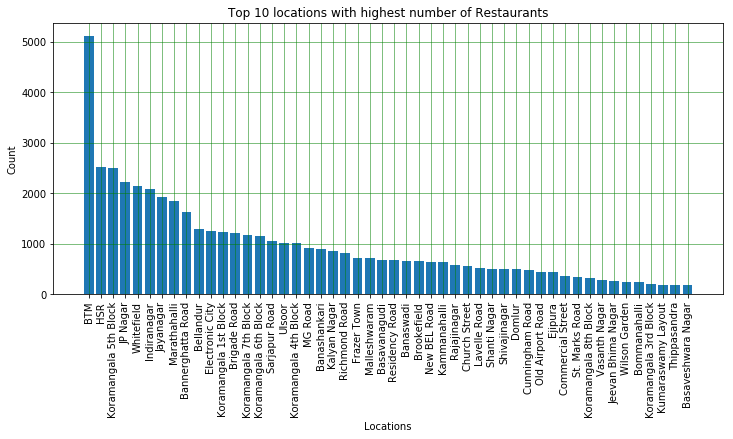

In [19]:
vs.location(bengaluru_res_df)

<a id='resttype'></a>
### 2.4 restaurant type and listed in type

#### 2.4.1 Resraurant Listed In
For quick searhces Zomato has categorized all the Restaurant types into 7 main categories. The ratios of all the  51,717  restaurants and there types is shown below:
<img src = "images/rest_type.png" width = "200">
src: https://www.zomato.com/bangalore/indiranagar-restaurants

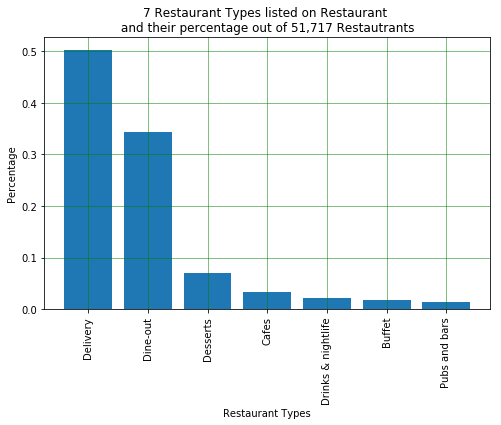

In [20]:
vs.rest_type_listedin(bengaluru_res_df)

#### 2.4.2 Restaurant Types as mentioned by the Restaurants
Restaurants can mention two types which are comma separated. From the code block below, the 3rd row, the types are Cafe and Casual Dining. this column has mixed nominal categorical values which are comma separated. 

In [21]:
bengaluru_res_df.loc[2]['rest_type']

'Cafe, Casual Dining'

- '1' example 'Cafe'
- '2' example 'Cafe,casual'
- '0' examle 'nan'

types counts: restaurant counts {1: 43763, 2: 7727, 3: 0, 0: 227}


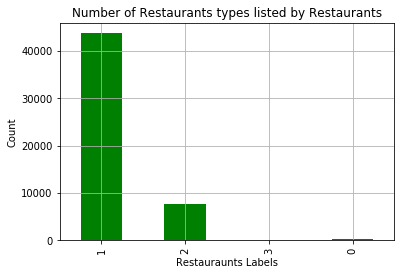

In [22]:
unique_rest = vs.rest_mixed_type(bengaluru_res_df)

In [23]:
print("Total Number ofUnique Restaurant types",len(unique_rest))
print("Unique Restaurant Types:")
unique_rest.keys()

Total Number ofUnique Restaurant types 25
Unique Restaurant Types:


dict_keys(['casualdining', 'cafe', 'quickbites', 'delivery', 'mess', 'dessertparlor', 'bakery', 'pub', 'takeaway', 'finedining', 'beverageshop', 'sweetshop', 'bar', 'confectionery', 'kiosk', 'foodtruck', 'microbrewery', 'lounge', 'foodcourt', 'dhaba', 'club', 'iranicafee', 'bhojanalya', 'popup', 'meatshop'])

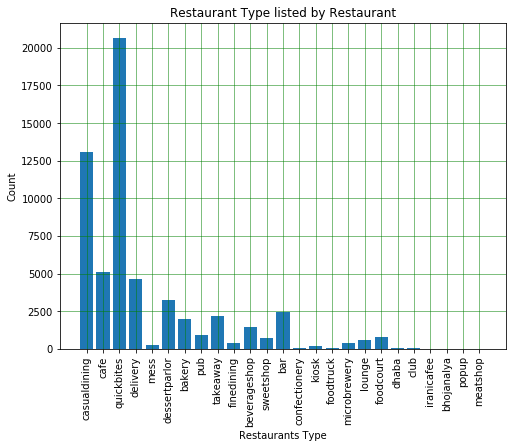

In [24]:
vs.unique_rest_types(bengaluru_res_df, unique_rest)

>**Inference** 
More than 20,000 restaurants are of quick bites type,<br>
followed by casual dinining places, followed by cafe and delivery types


<a id='cuisines'></a>
### 2.5 Cuisines

Cuisines is a mixed categorical column eg. 'Cafe, Mexican, Italian'. A restaurant can have upto 8 cuisines mentioned, which are comma separated.
Some restaurants have more than one cusines. <br>Number of cuisines: restaurant counts.  

In [25]:
bengaluru_res_df.loc[2]['cuisines']

'Cafe, Mexican, Italian'

The graph below shows the count of restaurants with 1 or more cuisines

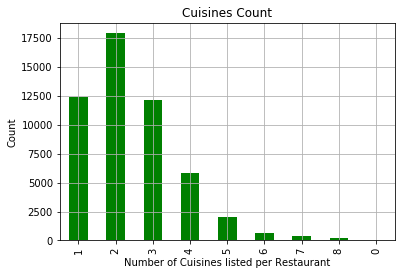

In [26]:
unique_cuisines = vs.unique_cuisines(bengaluru_res_df)

Total Number of Unique cuisines: 107


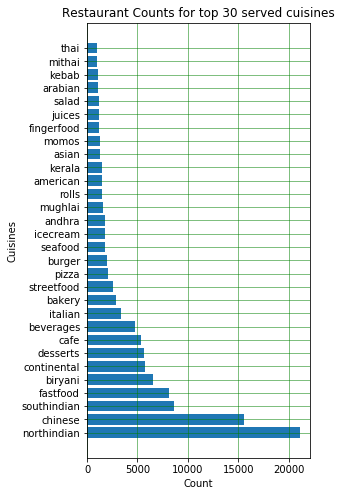

In [27]:
vs.unique_cuisines_top30(bengaluru_res_df,unique_cuisines)

**Inference**
There are more than 20,000 restaurants which servies North Indian, which makes it the top served cusine in Bengaluru, followed by chinese and southIndian Food.

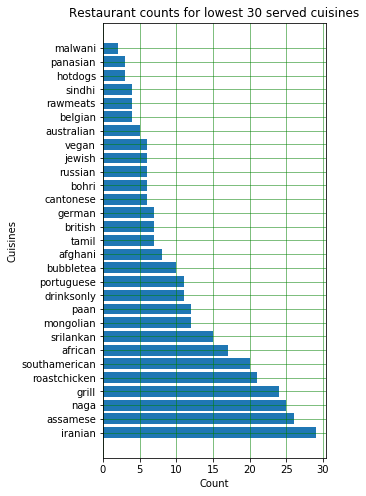

In [28]:
vs.unique_cuisines_lowest30(bengaluru_res_df,unique_cuisines)

**Inference:** Malwani, Panasian, hotdogs,sindhi, australian and few more cusines are the least served cuisines with only 2-10 places serving them.  

**Summary**
- 12.5% of restaurants out of 51,717 have book table options  and  58.9% have order online option,
- Ratings are distributed on normal curve centered around 3.8-3.9.  
- Approximately 24% of restaurants have ratings between 4-5. That is only 24% of them are on the right side of the normal curve
- There are 30 listed locations in Bengaluru for quick searches of restaurants, BTM containing the most number of Restaurants
- There are 7 listed restauranted types by Zomato for quick searches, DElivery being on top.
- There are 25 unique Restaurant types as listed by the restaurants themsevles. Some have mentioned two types. There are more number of Quickbites and casual dinings types of restaurants in Bengaluru.
- There are 107 unique cuisines served. Each restaurant serves minimum of 1 cuisine and maximum of 8. NorthIndian, chinease, southIndian and fastfood is the most popular. Malwani, Panasian, hotdogs,sindhi, australian and few more cusines are the least served cuisines with only 2-10 places serving them.

<a id='preprocessing'></a>
## 3. Data Pre-Processing

<a id='assessingcol'></a>
### 3.1 Assessing columns
- 3.1.1 Renaming columns - columns have spaces and few have charcters (,), renaming these columns with lower underscore separated columns
- 3.1.2 Assessing Columns - replacing empty lists '[]' and nans
- 3.1.3 Droping unwated columns

#### 3.1.1 Renaming columns

Renaming columns because of bad column name 
- approx_cost(for two people) to cost_for_two
- listed_in(type) to listed_in_type
- listed_in(city) to listed_in_city

In [29]:
bengaluru_res_df = bengaluru_res_df.rename(columns={"approx_cost(for two people)": "cost_for_two", "listed_in(type)": "listed_in_type","listed_in(city)":"listed_in_city"})

#### 3.1.2 Assessing colunmns

Converting menu_item empty list '[]' to NaN

In [30]:
print(bengaluru_res_df["menu_item"].unique()[0])

[]


In [31]:
bengaluru_res_df.replace(['[]'],np.nan,inplace=True)

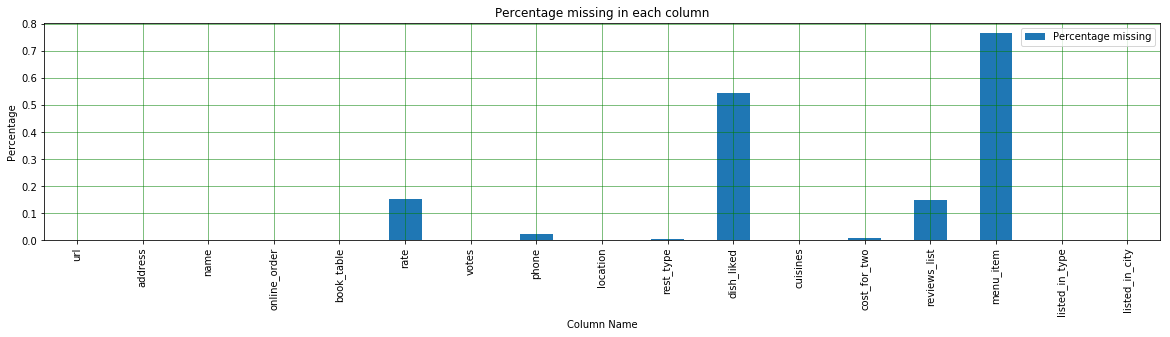

In [32]:
vs.column_nan_ratios(bengaluru_res_df)

**Inference**
- More than 75% of menu_items are missing
- More than 50% of Dish_liked is missing
- close to 15% of ratings are missing
- 15% of reviews are missing
- less tahn 5% of phone numbers, cost for two and restaurant types are missing

#### 3.1.3 Dropping columns 

URL, Address, name
Columns - URL, Address and name needs to be dropped
 - The URL
 - Name - most of the names have their short address with their names. The number of words can not be used to analyse the sdata
 - Address - The locality and city in Bengalure is mentioned in another column.
 - Votes - The new restaurants will not have any prior vote counts 
 - dish_liked - More than 50% of the data is missing, hence can not be used for nanylysis and machine learning
 - menu_item - More than 75% of data is not provided, This column can not be used for analysis or prediction
 - review_list - The new restautrant won't have a review list as it is a new restaurant on Zomato

In [33]:
bengaluru_res_df.drop(columns=['url', 'address','name','votes','menu_item','dish_liked','reviews_list'],inplace = True, errors ='ignore')

In [34]:
bengaluru_res_df.head(2)

,online_order,book_table,rate,phone,location,rest_type,cuisines,cost_for_two,listed_in_type,listed_in_city
0,Yes,Yes,4.1/5,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari


Missing values after Dropping unwanted columns

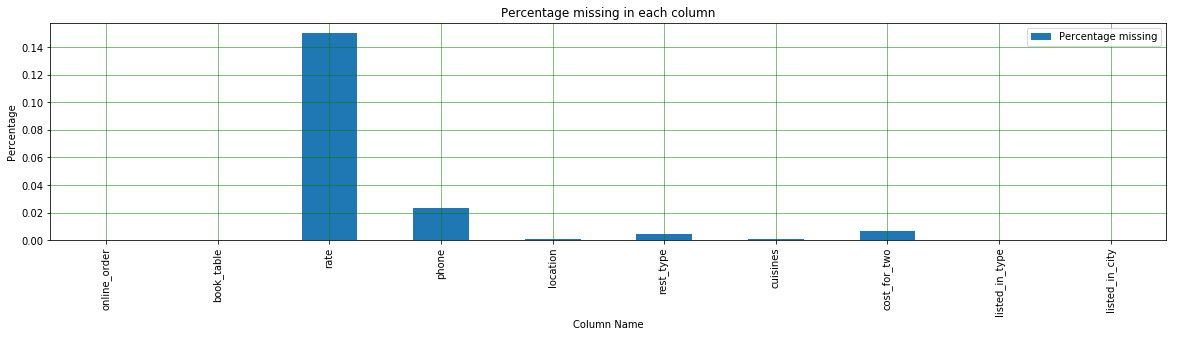

In [35]:
vs.column_nan_ratios(bengaluru_res_df)

<a id='assessingrow'></a>
### 3.2 Assessing Rows


- 3.2.1 Assessing target column
- 3.2.2 Assessing phone column¶
- 3.2.3 threshold for missing in rows

#### 3.2.1 Assessing target column

In [36]:
(bengaluru_res_df['rate'].isnull().sum()/bengaluru_res_df['rate'].shape[0])*100

15.033741322969234

In [37]:
bengaluru_res_df[bengaluru_res_df['rate'] == 'NEW'].shape

(2208, 10)

>15 percent of target values are missing, droping Rows with missing ratings as these rows cannot be used to train the model.<br>
**2208 restaurants are listed as NEW on omato and is stored in "bengaluru_res_df_new"** for prediction after training the model.

In [38]:
bengaluru_res_df.dropna(subset=['rate'], inplace = True)

In [39]:
bengaluru_res_df.drop(bengaluru_res_df[bengaluru_res_df.rate == '-'].index, axis=0, inplace=True)

In [40]:
bengaluru_res_df_new = bengaluru_res_df[bengaluru_res_df['rate'] == 'NEW']
bengaluru_res_df.drop(bengaluru_res_df[bengaluru_res_df.rate == 'NEW'].index, axis=0, inplace=True)

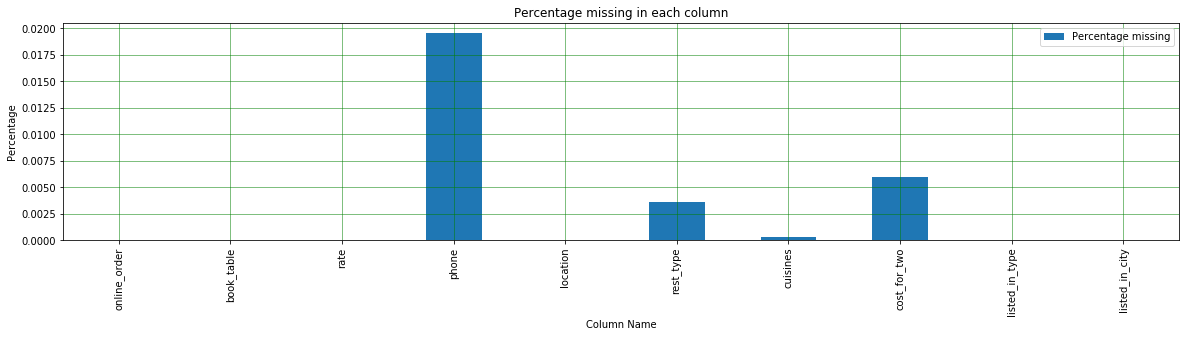

In [41]:
vs.column_nan_ratios(bengaluru_res_df)

The Rate column has zero missing values now

#### 3.2.2 Assessing phone column
More than 2% of percent of phone number is missing for this project I am **assuming the missing phone numbers as no phone numbers** provided and **replacing NaN values with 0**

In [42]:
bengaluru_res_df['phone'].fillna(0, inplace = True)

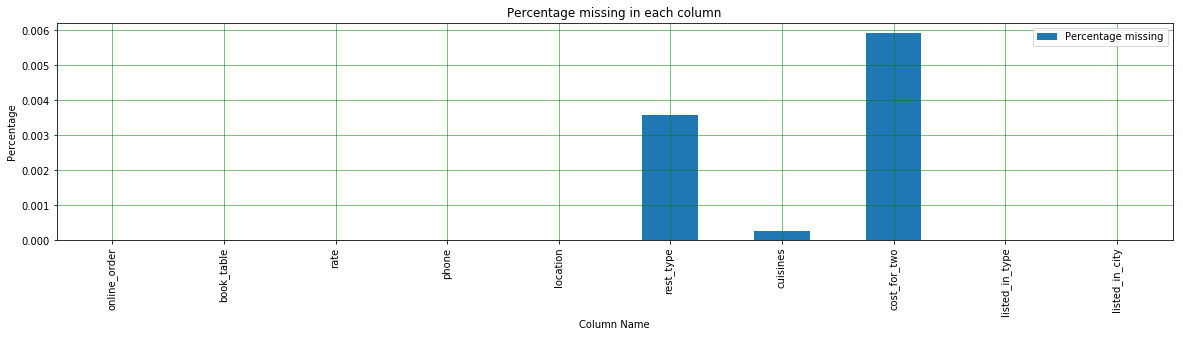

In [43]:
vs.column_nan_ratios(bengaluru_res_df)

#### 3.2.3 threshold for missing in rows

For this project I am dropping rows with more than 1 missing values

In [44]:
threshold = 1
ls_threshold = bengaluru_res_df.loc[((bengaluru_res_df.isnull().sum(axis = 1)) <= threshold) & ((bengaluru_res_df.isnull().sum(axis = 1)) != 0) ]
#Rows count for NaNs count more than threshold
gr_threshold = bengaluru_res_df.loc[(bengaluru_res_df.isnull().sum(axis = 1)) > threshold]

In [45]:
print("Number of Restaurants before dropping rows having missing valuemore than 1:",bengaluru_res_df.shape[0])
print(ls_threshold.shape[0])
gr_threshold.shape[0]


Number of Restaurants before dropping rows having missing valuemore than 1: 41665
397


5

In [46]:
bengaluru_res_df.dropna(thresh = len(bengaluru_res_df.columns)-threshold,inplace = True)
print("Number of Restaurants after dropping rows having missing valuemore than 1:",bengaluru_res_df.shape[0])

Number of Restaurants after dropping rows having missing valuemore than 1: 41660


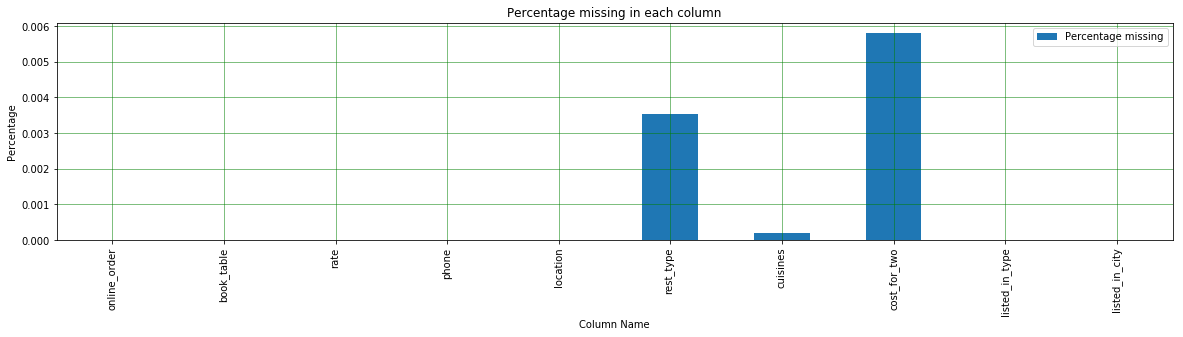

In [47]:
vs.column_nan_ratios(bengaluru_res_df)

<a id='precol'></a>
### 3.3 Reencoding columns

In this section the columns are preprossed from string values to integer/binary values. All the columns are of object type and needs to be converted. the remaining 10 columns are:
-  non numerical binary categorical
- Numerical data in form of string
- nominal categorical data
- mixed nominal categorical data

In [48]:
bengaluru_res_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41660 entries, 0 to 51716
Data columns (total 10 columns):
online_order      41660 non-null object
book_table        41660 non-null object
rate              41660 non-null object
phone             41660 non-null object
location          41660 non-null object
rest_type         41513 non-null object
cuisines          41652 non-null object
cost_for_two      41418 non-null object
listed_in_type    41660 non-null object
listed_in_city    41660 non-null object
dtypes: object(10)
memory usage: 3.5+ MB


**About Columns:**
1. Non Numerical Binary columns,
    - `online_order` - yes or no for oline order booking
    - `book_table` - yes or no for table booking

2. Numerical,float
    - `Rate` - 1,1.1,1.2,....,4.9,5
    - `phone` 
        - 0 for no phone numbers
        - 1 for one phonr number provided
        - 2 for two phone number provided
    - `cost_for_two` - Approx cost for two in the restaurants

> **Note:** For this project I am counting the number of phone numbers provided on Zomato

3. Multi level categorical columns
    - `location`  - nearest location of the restaurant in the city eg. Marathahalli, Shivajinagar - 93 unique names    
    - `listed_in_city` - part of the city in Bengaluru eg Church Street, BTM - 30 unique names
    - `listed_in_type` - Type of the restaurant on zomato - 7 unqiue types
 
4. Mixed categorical columns
    - `rest_type` - restaurant type as mentioned by the restaurant - few have two types
    - `cuisines` - cuisines type as menstioned by the restaurant - restaurant may have cuisines type between 1-8.





#### 3.3.1 Non Numerical Binary column to dummy variables

Created dummy variables for both the columns which gave 4 columns with binary values. Few restaurants types don’t have tables example few quick bites, cafes don’t really need booking tables hence did not binaries the columns to 1 for yes and 0 for No. 

In [49]:
print("Columns count:",len(bengaluru_res_df.columns))

Columns count: 10


In [50]:
#yes_no_1_0 = {'Yes':1,'No':0}
#bengaluru_res_df['online_order'] = bengaluru_res_df.apply(lambda x: yes_no_1_0[x.online_order], axis=1)
bengaluru_res_df = pd.get_dummies(bengaluru_res_df, columns=['online_order'])

In [51]:
#bengaluru_res_df['book_table'] = bengaluru_res_df.apply(lambda x: yes_no_1_0[x.book_table], axis=1)
bengaluru_res_df = pd.get_dummies(bengaluru_res_df, columns=['book_table'])

In [52]:
#converting the new columns to lower case
bengaluru_res_df.columns = [x.lower() for x in bengaluru_res_df.columns]

In [53]:
#Displaying columns after a dummy columns were created
bengaluru_res_df.columns

Index(['rate', 'phone', 'location', 'rest_type', 'cuisines', 'cost_for_two',
       'listed_in_type', 'listed_in_city', 'online_order_no',
       'online_order_yes', 'book_table_no', 'book_table_yes'],
      dtype='object')

In [54]:
print("Columns count:",len(bengaluru_res_df.columns))

Columns count: 12


#### 3.3.2 Numerical,float

- Ratings are given in the form of a string “1.5 /5”. A function is defined in helper.py which removes spaces separates rates where“/”  and returns 1.5 in form of float.
- Phones are in the form of str “+91 9865745477\n\r 080 67577578” which are either 8 digit for landline or 10 digits for mobile.
- Cost for two is given in string with commas “1,700”. A function on the column removes comma and returns the integer value example “1,700” to 1700. returns numpy nan for misisng value.

In [55]:
bengaluru_res_df.loc[2]['rate']

'3.8/5'

In [56]:
#function replaces any space
#returns float value separated by "/" and np.nan for missing value
bengaluru_res_df['rate'] = bengaluru_res_df.apply(lambda x: rates(x.rate), axis=1)

In [57]:
bengaluru_res_df.loc[2]['phone']

'+91 9663487993'

In [58]:
#Function checks 8 continuos integers and increases the phone count by 1
#returns number of phone numbers and 0 for missing value
bengaluru_res_df['phone'] = bengaluru_res_df.apply(lambda x: phone_num_count(x.phone), axis=1)

In [59]:
bengaluru_res_df.loc[2]['cost_for_two']

'800'

In [60]:
#function str_to_float replaces "," and " "-space and returns the float value of the cost. 
# returns np.nan for missing value
bengaluru_res_df['cost_for_two'] = bengaluru_res_df.apply(lambda x: str_to_float(x.cost_for_two), axis=1)

<a id='describe'></a>

<a id='stats'></a>

In [61]:
bengaluru_res_df.describe()

,rate,phone,cost_for_two,online_order_no,online_order_yes,book_table_no,book_table_yes
count,41660.000000,41660.000000,41418.000000,41660.000000,41660.000000,41660.000000,41660.000000
mean,3.700504,1.076092,603.268048,0.346952,0.653048,0.848680,0.151320
std,0.440468,0.660766,464.327857,0.476006,0.476006,0.358365,0.358365
min,1.800000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,3.400000,1.000000,300.000000,0.000000,0.000000,1.000000,0.000000
50%,3.700000,1.000000,500.000000,0.000000,1.000000,1.000000,0.000000
75%,4.000000,2.000000,700.000000,1.000000,1.000000,1.000000,0.000000
max,4.900000,2.000000,6000.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
bengaluru_res_df['cost_for_two'].median()

500.0

In [63]:
bengaluru_res_df['cost_for_two'].mean()

603.2680477087257

In [64]:
bengaluru_res_df.corr()

,rate,phone,cost_for_two,online_order_no,online_order_yes,book_table_no,book_table_yes
rate,1.000000,-0.039605,0.385183,-0.068326,0.068326,-0.424651,0.424651
phone,-0.039605,1.000000,-0.007960,-0.048984,0.048984,-0.004695,0.004695
cost_for_two,0.385183,-0.007960,1.000000,0.175517,-0.175517,-0.614338,0.614338
online_order_no,-0.068326,-0.048984,0.175517,1.000000,-1.000000,-0.051055,0.051055
online_order_yes,0.068326,0.048984,-0.175517,-1.000000,1.000000,0.051055,-0.051055
book_table_no,-0.424651,-0.004695,-0.614338,-0.051055,0.051055,1.000000,-1.000000
book_table_yes,0.424651,0.004695,0.614338,0.051055,-0.051055,-1.000000,1.000000


**Inference:**<br>
- small correlation can be seen between rates and cost_for_two which was expected
- a positive correlation can be seen between booking table and rates.

In [65]:
bengaluru_res_df.columns

Index(['rate', 'phone', 'location', 'rest_type', 'cuisines', 'cost_for_two',
       'listed_in_type', 'listed_in_city', 'online_order_no',
       'online_order_yes', 'book_table_no', 'book_table_yes'],
      dtype='object')

#### 3.3.3 Multi level categorical columns

#### 1. methods to deal with multi level categorical values
https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/

The location columns is nominal as the name there are total 93 distinct location for Restaurants in Bengaluru
- Creating dummy values
- creating new levels based on frequency
- Converting to numeric values - label encoding
- Hashing
there are other complicated encoders such as Hermet, sum, backward, polynomial encoders
>For my project **I used creating dummy variables** because it saves all the information in form of binary input. Giving labels to more than 30 values will takeout all the information and it will be difficult to process the data for prediction.

**i) listed_in_type column**
Types of restaurants listed by Zomato for quick searches - 7 unqiue types.
- The types are converted into lower case with space replaced by "_" undercolumn
- dummies are created for these 7 types.

In [66]:
listed_rest_types = bengaluru_res_df['listed_in_type'].unique()
listed_rest_types

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [67]:
print("Columns count before dummies:",len(bengaluru_res_df.columns))

Columns count before dummies: 12


In [68]:
#replacing space with "_" and string to lower case
bengaluru_res_df['listed_in_type'] = bengaluru_res_df.apply(lambda x: x.listed_in_type.replace(" ","_").lower(), axis = 1)

In [69]:
#Getting dummies for listed_in_type
bengaluru_res_df = pd.get_dummies(bengaluru_res_df, columns=['listed_in_type'])

In [70]:
print("Columns count after dummies:",len(bengaluru_res_df.columns))

Columns count after dummies: 18


In [71]:
bengaluru_res_df.columns

Index(['rate', 'phone', 'location', 'rest_type', 'cuisines', 'cost_for_two',
       'listed_in_city', 'online_order_no', 'online_order_yes',
       'book_table_no', 'book_table_yes', 'listed_in_type_buffet',
       'listed_in_type_cafes', 'listed_in_type_delivery',
       'listed_in_type_desserts', 'listed_in_type_dine-out',
       'listed_in_type_drinks_&_nightlife', 'listed_in_type_pubs_and_bars'],
      dtype='object')

**ii) listed_in_city column**
these are the city location in Bengaluru that Zomato has listed all its restaurants:
- There are 30 locations
- The types are converted into lower case with space replaced by "_" undercolumn

In [72]:
#printiing unique 30 locations listed by zomato
listed_rest_city_loc = bengaluru_res_df['listed_in_city'].unique()
listed_rest_city_loc

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [73]:
bengaluru_res_df['listed_in_city'] = bengaluru_res_df.apply(lambda x: x.listed_in_city.replace(" ","_").lower(), axis = 1)

In [74]:
print("Columns count before dummies:",len(bengaluru_res_df.columns))

Columns count before dummies: 18


In [75]:
bengaluru_res_df = pd.get_dummies(bengaluru_res_df, columns=['listed_in_city'])

In [76]:
print("Columns count after dummies:",len(bengaluru_res_df.columns))

Columns count after dummies: 47


In [77]:
bengaluru_res_df.columns

Index(['rate', 'phone', 'location', 'rest_type', 'cuisines', 'cost_for_two',
       'online_order_no', 'online_order_yes', 'book_table_no',
       'book_table_yes', 'listed_in_type_buffet', 'listed_in_type_cafes',
       'listed_in_type_delivery', 'listed_in_type_desserts',
       'listed_in_type_dine-out', 'listed_in_type_drinks_&_nightlife',
       'listed_in_type_pubs_and_bars', 'listed_in_city_banashankari',
       'listed_in_city_bannerghatta_road', 'listed_in_city_basavanagudi',
       'listed_in_city_bellandur', 'listed_in_city_brigade_road',
       'listed_in_city_brookefield', 'listed_in_city_btm',
       'listed_in_city_church_street', 'listed_in_city_electronic_city',
       'listed_in_city_frazer_town', 'listed_in_city_hsr',
       'listed_in_city_indiranagar', 'listed_in_city_jayanagar',
       'listed_in_city_jp_nagar', 'listed_in_city_kalyan_nagar',
       'listed_in_city_kammanahalli', 'listed_in_city_koramangala_4th_block',
       'listed_in_city_koramangala_5th_block'

**iii) location column**<br>
there are 93 unique locations, for this project I am considering "listed_in_city" for location and droping "location" column

In [78]:
bengaluru_res_df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'Electronic City', 'Sarjapur Road', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Marathahalli', 'Whitefield',
       'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'Domlur', 'Koramangala 8th Block', 'Ejipura',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Seshadripuram',
       'Kammanahalli', 'Koramangala 6th Block', 'Majestic'

In [79]:
#bengaluru_res_df['location'] = le.transform(bengaluru_res_df['location']) 
bengaluru_res_df.drop(columns = ['location'],inplace = True, axis = 1) 

In [80]:
len(bengaluru_res_df.columns)

46

#### 3.3.4 mixed Multi level categorical columns
- rest_type - restaurant type as mentioned by the restaurant - few have two types, **converting rest_type** the 
creating two columns for rest_type which separates the two restaurant types **in rest_type1 and rest_type2**. the value is converted to lower case and the space is removed. example

| rest_type   |
|------------|
|   Cafe,Casual Dining|

| rest_type1 | rest_type2   |  
|------|------|
|   cafe  | casualdining|

- cuisines - cuisines type as menstioned by the restaurant - restaurant may have cuisines type between 1-8. **converting cuisines** to two columns **cuisines_type_1 and cuisines_type_2** which contains first two cuisines in two columns.the value is converted to lower case and the space is removed. example

| cuisines   |
|------------|
|   North Indian, Fast Food, South Indian|

| cuisines_type1 | cuisines_type2   |  
|------|------|
|   northindian  | fastfood|

**i) rest_type**

In [81]:
#before processing
bengaluru_res_df['rest_type'][2]

'Cafe, Casual Dining'

In [82]:
#converting to lower case and replacing space with no space
bengaluru_res_df['rest_type'] = bengaluru_res_df.apply(lambda x: lower_(x.rest_type), axis=1)

In [83]:
#after processin
bengaluru_res_df['rest_type'][2]

'cafe,casualdining'

In [84]:
bengaluru_res_df['rest_type1'] = bengaluru_res_df.apply(lambda x: type_x(x.rest_type,1), axis=1)
bengaluru_res_df['rest_type2'] = bengaluru_res_df.apply(lambda x: type_x(x.rest_type,2), axis=1)

In [85]:
print(len(bengaluru_res_df['rest_type1'].unique()))
bengaluru_res_df['rest_type1'].unique()

23


array(['casualdining', 'cafe', 'quickbites', 'delivery', 'mess',
       'dessertparlor', 'bakery', 'pub', 'takeaway', 'finedining',
       'beverageshop', 'sweetshop', 'bar', 'kiosk', 'foodtruck',
       'microbrewery', 'lounge', 'foodcourt', nan, 'dhaba', 'club',
       'confectionery', 'bhojanalya'], dtype=object)

In [86]:
print(len(bengaluru_res_df['rest_type2'].unique()))
bengaluru_res_df['rest_type2'].unique()

18


array([nan, 'casualdining', 'cafe', 'quickbites', 'dessertparlor',
       'delivery', 'sweetshop', 'bar', 'beverageshop', 'bakery', 'pub',
       'microbrewery', 'foodcourt', 'iranicafee', 'lounge', 'kiosk',
       'mess', 'meatshop'], dtype=object)

**Inference**<br>
There are 25 unique restaurants listed by them, it was seen that the first column created  **rest_type1** has only 23 unique types out of 25 and ** rest_type2** has only 18 unique types out of 25. 
> **Note:**The dummies cannot be created using pd.dummies, **the below code creates dummy columns for all the unique rest type  (for rest in unique_rest) for the columns rest_type1,rest_type2**
<br> **unique_rest** - contain unique restaurants types created during exploration of rest_type

print("Restaurant type unique mentioned in rest_type:" len(unique_rest.keys()))
vs.unique_rest_types(bengaluru_res_df, unique_rest)

In [87]:
print("columns before creating dummies:")
len(bengaluru_res_df.columns)

columns before creating dummies:


48

In [88]:
#code which creates dummy variable for both the column rest_type1 and rest_type2
for rest in unique_rest:
    column_name1 = 'rest_type1_'+ rest
    column_name2 = 'rest_type2_' + rest
    bengaluru_res_df[column_name1] = bengaluru_res_df.apply(lambda x: 1 if x.rest_type1 == rest else 0, axis=1)
    bengaluru_res_df[column_name2] = bengaluru_res_df.apply(lambda x: 1 if x.rest_type2 == rest else 0, axis=1)
    #print(column_name)

In [89]:
#dropping columns after creating columns
bengaluru_res_df.drop(columns =['rest_type1','rest_type2','rest_type'],inplace = True)

In [90]:
print("columns after creating dummies:")
len(bengaluru_res_df.columns)

columns after creating dummies:


95

In [91]:
#https://stackoverflow.com/questions/36808434/label-encoder-encoding-missing-values
#bengaluru_res_df['rest_type1'] = bengaluru_res_df.apply(lambda x: le.transform([x.rest_type1])[0] if type(x.rest_type1) == str else x.rest_type1,axis = 1)
#bengaluru_res_df['rest_type2'] = bengaluru_res_df.apply(lambda x: le.transform([x.rest_type2])[0] if type(x.rest_type2) == str else x.rest_type2,axis = 1)

**ii). cuisines**

In [92]:
bengaluru_res_df['cuisines'] = bengaluru_res_df.apply(lambda x: lower_(x.cuisines), axis=1)

In [93]:
bengaluru_res_df['cuisines'].head()

0    northindian,mughlai,chinese
1       chinese,northindian,thai
2           cafe,mexican,italian
3        southindian,northindian
4         northindian,rajasthani
Name: cuisines, dtype: object

In [94]:
bengaluru_res_df['cuisines_1'] = bengaluru_res_df.apply(lambda x: type_x(x.cuisines,1), axis=1)
bengaluru_res_df['cuisines_2'] = bengaluru_res_df.apply(lambda x: type_x(x.cuisines,2), axis=1)

> Creating dummy variable using for loop, because columns cuisines_1, cuisines_2 may not contain all unique cuisine type<br>
**unique_cuisines** - contains unique cuisines created during exploration

In [95]:
print("columns before creating dummies:")
len(bengaluru_res_df.columns)

columns before creating dummies:


97

In [96]:
for cuisine in unique_cuisines:
    cuisine = cuisine.lower()
    column_name1 = 'cuisines_1_'+ cuisine
    column_name2 = 'cuisines_2_' + cuisine
    bengaluru_res_df[column_name1] = bengaluru_res_df.apply(lambda x: 1 if x.cuisines_1 == cuisine else 0, axis=1)
    bengaluru_res_df[column_name2] = bengaluru_res_df.apply(lambda x: 1 if x.cuisines_2 == cuisine else 0, axis=1)

In [97]:
bengaluru_res_df.drop(columns =['cuisines_1','cuisines_2','cuisines'],inplace = True)

In [98]:
print("columns after creating dummies:")
len(bengaluru_res_df.columns)

columns after creating dummies:


308

In [99]:
bengaluru_res_df.head()

,rate,phone,cost_for_two,online_order_no,online_order_yes,book_table_no,book_table_yes,listed_in_type_buffet,listed_in_type_cafes,listed_in_type_delivery,...,cuisines_1_jewish,cuisines_2_jewish,cuisines_1_vegan,cuisines_2_vegan,cuisines_1_rawmeats,cuisines_2_rawmeats,cuisines_1_malwani,cuisines_2_malwani,cuisines_1_sindhi,cuisines_2_sindhi
0,4.1,2,800.0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.1,1,800.0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,1,800.0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.7,0,300.0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.8,1,600.0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**Dataframe after processing all the data**:

In [100]:
bengaluru_res_df.shape

(41660, 308)

- The processed dataframe contains 

### 3.3.5 Processing Target variable
<img src = "images/labels.png" width = "400">
the target bin is labelled here for training the model.<br>
as the diagram suggests the ratings will be labelled as which bin it beongs to for the model to train.
After training the model the model will predit which label/bin the NEW restaurant belongs to.
- ratings between 1-1.4 - labelled as 0
- ratings between 1.5-1.9 - labelled as 1
- ratings between 2-2.4 - labelled as 2
- ratings between 2.5-2.9.4 - labelled as 3
- ratings between 3-3.4 - labelled as 4
- ratings between 3.5-3.9 - labelled as 5
- ratings between 4-4.4 - labelled as 6
- ratings between 4.4-5 - labelled as 7
>**A new columns rate_color is created to store the labels**.
Creating **target** variables and **feature** columns

In [101]:
bengaluru_res_df['rate'].isnull().sum()

0

In [102]:
bengaluru_res_df['rate_color'] = bengaluru_res_df.apply(lambda x: target_rates_to_color(x.rate),axis= 1)

In [103]:
bengaluru_res_df['rate_color'].unique()

array([6, 5, 7, 4, 3, 2, 1], dtype=int64)

In [104]:
#rate_to_label = {}
#label = 0
#for i in np.linspace(1,5,41):
    #print(round(i,1))
    #rate_to_label[np.round(i,1)] = label
    #label += 1

#bengaluru_res_df['rate'] = bengaluru_res_df.apply(lambda x: rate_to_label[x.rate],axis= 1)

In [105]:
#bengaluru_res_df['rate'].unique()

In [106]:
bengaluru_res_df['rate_color'].head()

0    6
1    6
2    5
3    5
4    5
Name: rate_color, dtype: int64

In [107]:
#bengaluru_res_df['rate'].head()

>Creating target variables and feature columns

In [108]:
target = bengaluru_res_df[['rate','rate_color']]
features = bengaluru_res_df.drop(columns = ['rate','rate_color'],axis = 1)

<a id='impfea'></a>
### 3.3.4 imputing and Feature Scaling

Only cost_for_two has 242 missing values out of 41,660. The missing value will be replaced by median. Median is less than the mean. all the other columns are converted to binary hence will have 0 for missing or 1 for present.

In [109]:
print(bengaluru_res_df.shape)
bengaluru_res_df['cost_for_two'].isnull().sum()

(41660, 309)


242

In [110]:
bengaluru_res_df['cost_for_two'].median()

500.0

In [111]:
bengaluru_res_df['cost_for_two'].mean()

603.2680477087257

In [112]:
imp_median = SimpleImputer(missing_values=np.NaN, strategy='median')

bengaluru_res_df_imp has no missing values and can be used for training

In [113]:
bengaluru_res_df_imp = pd.DataFrame(imp_median.fit_transform(features))

In [114]:
bengaluru_res_df_imp.isnull().sum().sum()

0

In [115]:
bengaluru_res_df_imp.columns = features.columns

In [116]:
bengaluru_res_df_imp.head(2)

,phone,cost_for_two,online_order_no,online_order_yes,book_table_no,book_table_yes,listed_in_type_buffet,listed_in_type_cafes,listed_in_type_delivery,listed_in_type_desserts,...,cuisines_1_jewish,cuisines_2_jewish,cuisines_1_vegan,cuisines_2_vegan,cuisines_1_rawmeats,cuisines_2_rawmeats,cuisines_1_malwani,cuisines_2_malwani,cuisines_1_sindhi,cuisines_2_sindhi
0,2.0,800.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,800.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For this project most of the columns are binary, to preserve there value, I am going to using MinMax Scaller

$$x_new = \frac{x - x_min}{x_max - x_min} $$

$$x_max = maximum \ value \ in \ space \ the \ space \ column$$
$$x_min = minimum \ value \ in \ space \ the \ space \ column$$

In [117]:
scaler = MinMaxScaler()
bengaluru_res_df_sca = pd.DataFrame(scaler.fit_transform(bengaluru_res_df_imp))
bengaluru_res_df_sca.columns = bengaluru_res_df_imp.columns
bengaluru_res_df_sca.head(2)

,phone,cost_for_two,online_order_no,online_order_yes,book_table_no,book_table_yes,listed_in_type_buffet,listed_in_type_cafes,listed_in_type_delivery,listed_in_type_desserts,...,cuisines_1_jewish,cuisines_2_jewish,cuisines_1_vegan,cuisines_2_vegan,cuisines_1_rawmeats,cuisines_2_rawmeats,cuisines_1_malwani,cuisines_2_malwani,cuisines_1_sindhi,cuisines_2_sindhi
0,1.0,0.127517,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.127517,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id='traintest'></a>
### 3.5 Training and Test 

>There are 41660 restaurants for training 95% of the data is used. Since there are alot of rows only **5% of the data is reserved for testing** the benchmarck model and optimized Neural network model

In [118]:
X_train, X_test, y_train, y_test = train_test_split(bengaluru_res_df_sca, target,test_size=0.05, random_state=42)

<a id='benchmark'></a>
## 4. Training and testing Bench mark model

from sklearn linear model LinearRegression is used for training the becch mark model. Linear model is underfitting because it is assuming the problem is linear and that the prediction follows a linear equation. 
The Aim of this is to form a threshold for the final optimised model which should work better than the linear model.
$$\bar y = Wx + b $$<br>
$$ W = [W_1, W_2, W_3,...,W_n] $$
$$ x = [x_1, x_2, x_3,...,x_n] $$
<br>
**Accuracy score:** is the metric used which calculates the catergory correctly predicted by the model<br>
$$ Accuracy = \frac{ Correctly \ predicted \ Class}{Total \ Number \ of \ Predictions}  $$

In [119]:
LR = LinearRegression()

In [120]:
LR.fit(X_train, y_train['rate_color'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
y_hat = np.round(LR.predict(X_test))

In [122]:
y_test['rate_color'].shape

(2083,)

In [123]:
y_hat.shape

(2083,)

In [124]:
score = metrics.accuracy_score(y_test['rate_color'], y_hat)

In [125]:
score

0.5477676428228516

In [126]:
y_hat

array([5., 4., 5., ..., 5., 5., 6.])

> **Accuracy Score of the Linear model is 54.78%**

<a id='nn'></a>
## 5. NN Model 

**The Model is a Neural network with 307 inputs and 3 hidden layers and 8 categories/bins: **

- The neural Network Architechture is created using torch nn module, which has 8 output. Log_softmax is performed to get the label.
- nn.dropout(.02) is used so that the network does not over fit.
- nn.NLLLoss is used to calcuate the loss. since the output is a softmax which is in the form of exponential, Natural Log loss will be best to get the loss
- loss.backward() performs the backward pass
- optimizer.step() updates the new weight
- optimizer.zero_grad() sets the grdient to zero for next backword propagation
- model.eval() freezes the gradient and removes the dropout for evaluation/validation during training

**Minibatch:** - defined in train.py<br>
src:https://stackoverflow.com/questions/38157972/how-to-implement-mini-batch-gradient-descent-in-python<br>
src:https://stackoverflow.com/questions/50307707/convert-pandas-dataframe-to-pytorch-tensor<br>
- there are 39,577 rows for each epoch 4 mini batches are randomly created out of which 3 mini batches are used for training and 1 mini batch is used for validation 

**Parameter tuning for the model:**
-	Epochs
-	Learning rate
-	Mini Batch size
-	Number of Hidden layers
-	Number of Hidden nodes
<br>
<br>
**NN Architecture**
<br>
<img src = "images/Nn.png">

The model is created and trained using **train.py**

Epoch: 2/450..  Training Loss: 1.422..  validation Loss: 1.379..  validation Accuracy: 0.515
Epoch: 7/450..  Training Loss: 1.135..  validation Loss: 1.106..  validation Accuracy: 0.543
Epoch: 12/450..  Training Loss: 1.064..  validation Loss: 1.047..  validation Accuracy: 0.556
Epoch: 17/450..  Training Loss: 0.996..  validation Loss: 0.997..  validation Accuracy: 0.575
Epoch: 22/450..  Training Loss: 0.929..  validation Loss: 0.903..  validation Accuracy: 0.617
Epoch: 27/450..  Training Loss: 0.865..  validation Loss: 0.848..  validation Accuracy: 0.647
Epoch: 32/450..  Training Loss: 0.817..  validation Loss: 0.770..  validation Accuracy: 0.683
Epoch: 37/450..  Training Loss: 0.780..  validation Loss: 0.725..  validation Accuracy: 0.704
Epoch: 42/450..  Training Loss: 0.740..  validation Loss: 0.687..  validation Accuracy: 0.719
Epoch: 47/450..  Training Loss: 0.710..  validation Loss: 0.656..  validation Accuracy: 0.733
Epoch: 52/450..  Training Loss: 0.682..  validation Loss: 0.63

Epoch: 432/450..  Training Loss: 0.354..  validation Loss: 0.281..  validation Accuracy: 0.878
Epoch: 437/450..  Training Loss: 0.353..  validation Loss: 0.284..  validation Accuracy: 0.875
Epoch: 442/450..  Training Loss: 0.359..  validation Loss: 0.274..  validation Accuracy: 0.880
Epoch: 447/450..  Training Loss: 0.354..  validation Loss: 0.274..  validation Accuracy: 0.882


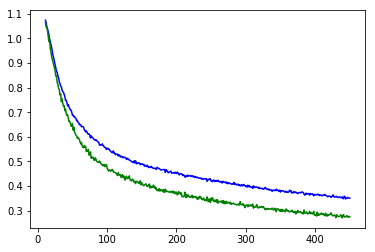

In [127]:
model = tr.create_train_model(X_train,y_train)

### Testing accuracy of the optimized model on test set

In [128]:
#converting the X_test into tensor type
X_test_t = torch.tensor(X_test.values).type(torch.float)

In [129]:
#Predicting for X_test
with torch.no_grad():
    model.eval()
    prediction = model(X_test_t)

In [130]:
ps = torch.exp(prediction)
ps.shape

torch.Size([2083, 8])

In [131]:
top_p, top_class = ps.topk(1, dim=1)

In [132]:
#converting tensor type to Series
top_class = pd.Series(top_class.numpy().ravel())

In [133]:
# calculating the score
score = metrics.accuracy_score(y_test['rate_color'], top_class)

In [134]:
score

0.7849255880940951

The accuracy score for the optimzed model is 76.33% 

<a id='predict'></a>
## 6. Predicitng Color Bin for New Restaurant

- **bengaluru_res_df_new dataframe containing information for the New restaurants** needs to be preocessed similarly as bengaluru_res_df to get 307 columns. 
- The total number of rows is for predicting is 2208.
- the **min max scaler** is perfomed manually by passing the minimum and maximum of phone and cost_for_two in a list.phone_min_max = [0,2]  cost_min_max = [40,6000]
- **pr.process()**  - perform preprocessing on the New restaurant data to get the 307 columns in the same order as order used for trainning
- **pr.predict()** - Performs prediction and returns top 3 classes in with probabilty showed in form of bar graph

In [135]:
#Printing the first two rows of the dataframe 
bengaluru_res_df_new.head(2)

,online_order,book_table,rate,phone,location,rest_type,cuisines,cost_for_two,listed_in_type,listed_in_city
72,No,No,NEW,+91 8050884222,Banashankari,Quick Bites,North Indian,150,Delivery,Banashankari
75,No,No,NEW,+91 8553206035,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500,Delivery,Banashankari


In [136]:
#printing rows and columns
bengaluru_res_df_new.shape

(2208, 10)

<a href = "#describe">describe</a>

In [137]:
#putting the max and min of phone and cost_for_two to scale the 
#min max filled using the describe()
phone_min_max = [0,2]
cost_min_max = [40,6000]

In [138]:
bengaluru_res_df_new_p = bengaluru_res_df_new.copy()

In [139]:
X_predict = pr.process(bengaluru_res_df_new_p,listed_rest_types,listed_rest_city_loc,unique_rest,unique_cuisines,phone_min_max,cost_min_max)

>** Prints if all the columns names and orders are same after processing the dataframe containng the NEW data set**

**Checking if the columns of for X_test and X_predict have the same number of columns which are equally ordered and have the same name**<br> prints True if matches the criteria else false

In [140]:
#check if the X_predict is processed correctly
print((X_test.columns.values == X_predict.columns.values).sum() == 307)

True


#### The index_ is used to do the prediction for index n in bengaluru_res_df_new dataframe containing the restaurant detail for the NEW one.<br>
From below we can see the selected restaurant at index_ and its processed form in the next code line

### Please change the index_ below to see results for other restaurants

In [141]:
#Predict bin for index 
index_ = 2110
bengaluru_res_df_new[index_:index_+1]

,online_order,book_table,rate,phone,location,rest_type,cuisines,cost_for_two,listed_in_type,listed_in_city
48206,Yes,No,NEW,+91 8043774001,MG Road,Casual Dining,"Biryani, Chinese, North Indian, South Indian",800,Dine-out,Residency Road


In [142]:
X_predict[index_:index_+1]

,phone,cost_for_two,online_order_no,online_order_yes,book_table_no,book_table_yes,listed_in_type_buffet,listed_in_type_cafes,listed_in_type_delivery,listed_in_type_desserts,...,cuisines_1_jewish,cuisines_2_jewish,cuisines_1_vegan,cuisines_2_vegan,cuisines_1_rawmeats,cuisines_2_rawmeats,cuisines_1_malwani,cuisines_2_malwani,cuisines_1_sindhi,cuisines_2_sindhi
48206,0.0,0.127517,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


VErifying signals which will be used to predict the bin

In [143]:
X_predict_t = torch.tensor(X_predict[index_:index_+1].values).type(torch.float)

In [144]:
X_predict_t.shape

torch.Size([1, 307])

### Predicting for selected restaurant index

The Top 3 Classes for the restaurant below with probabilities are:


,online_order,book_table,rate,phone,location,rest_type,cuisines,cost_for_two,listed_in_type,listed_in_city
48206,Yes,No,NEW,+91 8043774001,MG Road,Casual Dining,"Biryani, Chinese, North Indian, South Indian",800,Dine-out,Residency Road


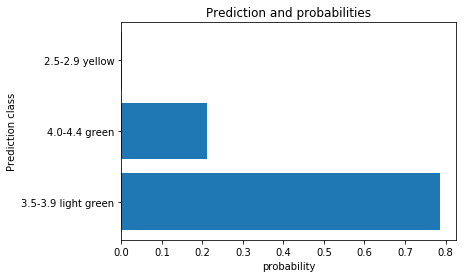

In [145]:
print("The Top 3 Classes for the restaurant below with probabilities are:")
display(bengaluru_res_df_new[index_:index_+1])
pr.predict(model,X_predict_t)

<a id ="lim"></a>
## 7. Limitation and  Conclusion

**Limitaions:**<br>
- The model can predict scores only for the REstaurants provided in csv and have rate value as "NEW"
- Assuming that missing numbers as count 0 i.e no phone number provided for restaurant
- 346 restaurants hav  cost for two missing which is replaced by median
- The model is only limited to predict Bengaluru Data
- Due to computation time only two columns were prepared from cuisines to store first two in "cuisine_type1" and cuisine_type2" respectively. There are restaurants with cuisines types upto 8.

**conclusion**
- The model is able to predict with 76% of accuracy  the colored bin the New restaurnt will fall into
- only 12.7% of restaurants have book table options in Bengaluru
- Only 23% of restaurants have ratings between 4-5.


**Improvement**
- User interface can be made which takes inputs for a new restuaunts
- Neural network can undergo pruning to remove unwanted excess nodes
- creating more columns for cuisine types to separate the comma separated cuisines
- XGBoost and other algorithms can be used to check if it performs better than NN

